In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**LECTURA DEL DATASET Y COMPROBACIÓN DE NULOS**

In [2]:
data = pd.read_csv('df_clean.csv')

In [3]:
valores_nulos=data.isnull().sum().sum()
valores_nulos

np.int64(0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          26582 non-null  object 
 1   description                                   26582 non-null  object 
 2   neighborhood_overview                         26582 non-null  object 
 3   host_name                                     26582 non-null  object 
 4   host_location                                 26582 non-null  object 
 5   host_response_time                            26582 non-null  object 
 6   host_response_rate                            26582 non-null  float64
 7   host_acceptance_rate                          26582 non-null  float64
 8   host_is_superhost                             26582 non-null  object 
 9   host_neighbourhood                            26582 non-null 

**INICIA TRATAMIENTO DE VALORES ATIPICOS**

In [5]:
data1=data.copy()

In [6]:
#CREACIÓN DE DOS DATAFRAMES PARA PROCESAR OUTLIERS

cualitativas = data1.select_dtypes(include=['object'])
cuantitativas = data1.select_dtypes(include=['float', 'int'])

In [7]:
cualitativas

,name,description,neighborhood_overview,host_name,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_identity_verified,...,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,first_review,last_review,instant_bookable
0,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",Dici,"Mexico City, Mexico",a few days or more,f,Sin especificar,"['email', 'phone', 'work_email']",t,...,Cuajimalpa de Morelos,Sin descripción,Entire villa,Entire home/apt,1 bath,"[""Free parking on premises"", ""Washer"", ""Wifi"",...",t,Sin fecha,Sin fecha,f
1,Condesa Haus,A new concept of hosting in mexico through a b...,Sin descripción,Fernando,"Mexico City, Mexico",within an hour,t,Condesa,"['email', 'phone', 'work_email']",t,...,Cuauhtémoc,Sin descripción,Entire home,Entire home/apt,5.5 baths,"[""Iron"", ""Washer"", ""Wifi"", ""Host greets you"", ...",t,2011-11-09,2023-03-26,f
2,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Sin descripción,Nicholas,"Mexico City, Mexico",within an hour,t,Hipódromo,"['email', 'phone']",t,...,Cuauhtémoc,Sin descripción,Entire rental unit,Entire home/apt,1 bath,"[""Iron"", ""Wifi"", ""Bathtub"", ""Refrigerator"", ""D...",t,2011-11-17,2024-05-05,f
3,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,"Mexico City, Mexico",within a few hours,t,Coyoacán,"['email', 'phone', 'work_email']",t,...,Coyoacán,Sin descripción,Entire rental unit,Entire home/apt,1 bath,"[""Iron"", ""Washer"", ""Outdoor furniture"", ""Wifi""...",t,2012-02-14,2024-09-22,f
4,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,"Mexico City, Mexico",within an hour,t,Polanco,"['email', 'phone']",t,...,Miguel Hidalgo,Sin descripción,Entire loft,Entire home/apt,1.5 baths,"[""Iron"", ""Washer"", ""Outdoor furniture"", ""Wifi""...",t,2016-05-30,2023-08-16,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,"Welcome to Lomas de Bezares, a neighborhood kn...",HostPal,"Mexico City, Mexico",within an hour,t,Sin especificar,"['email', 'phone']",t,...,Miguel Hidalgo,Sin descripción,Private room in guesthouse,Private room,1 private bath,"[""Wifi"", ""Heating"", ""Freezer"", ""Cleaning avail...",t,Sin fecha,Sin fecha,t
26578,Suite King | District Polanco,This spacious room features a plush king-size ...,Sin descripción,Luis Angel,"Mexico City, Mexico",within an hour,f,Polanco,"['email', 'phone']",t,...,Miguel Hidalgo,Sin descripción,Room in hotel,Private room,1 private bath,"[""Shared patio or balcony"", ""Iron"", ""Outdoor f...",t,Sin fecha,Sin fecha,t
26579,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Sin descripción,Luis Angel,"Mexico City, Mexico",within an hour,f,Polanco,"['email', 'phone']",t,...,Miguel Hidalgo,Sin descripción,Room in hotel,Private room,1 private bath,"[""Shared patio or balcony"", ""Iron"", ""Outdoor f...",t,Sin fecha,Sin fecha,t
26580,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Sin descripción,Luis Angel,"Mexico City, Mexico",within an hour,f,Polanco,"['email', 'phone']",t,...,Miguel Hidalgo,Sin descripción,Room in hotel,Private room,1 private bath,"[""Shared patio or balcony"", ""Iron"", ""Outdoor f...",t,Sin fecha,Sin fecha,t


In [8]:
cuantitativas

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,0.0,99.0,1,1,19.383820,-99.273340,2,1.0,1.0,3865.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1,1,0
1,100.0,93.0,12,13,19.411620,-99.177940,14,5.0,1.0,999.0,...,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8,4,1
2,71.0,57.0,3,4,19.411520,-99.168570,4,2.0,2.0,2029.0,...,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2,2,0
3,100.0,100.0,3,4,19.356140,-99.163080,2,1.0,1.0,1140.0,...,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3,2,1
4,100.0,100.0,5,7,19.432110,-99.193270,2,1.0,1.0,3633.0,...,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,100.0,100.0,167,279,19.387329,-99.246731,4,2.0,2.0,488.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,37,14,23
26578,100.0,100.0,16,16,19.432687,-99.197736,2,1.0,1.0,2800.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16,8,8
26579,100.0,100.0,16,16,19.432687,-99.197736,2,1.0,1.0,2700.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16,8,8
26580,100.0,100.0,16,16,19.432687,-99.197736,2,1.0,1.0,2600.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16,8,8


**DIAGRAMA DE BIGOTE O CAJA DE TODAS LAS COLUMNAS DEL DATASET**

<Figure size 1500x800 with 0 Axes>

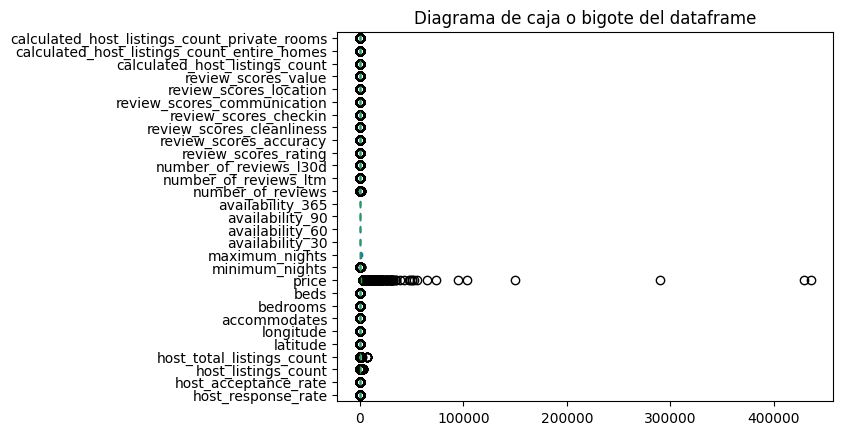

In [9]:
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote del dataframe')
plt.show()

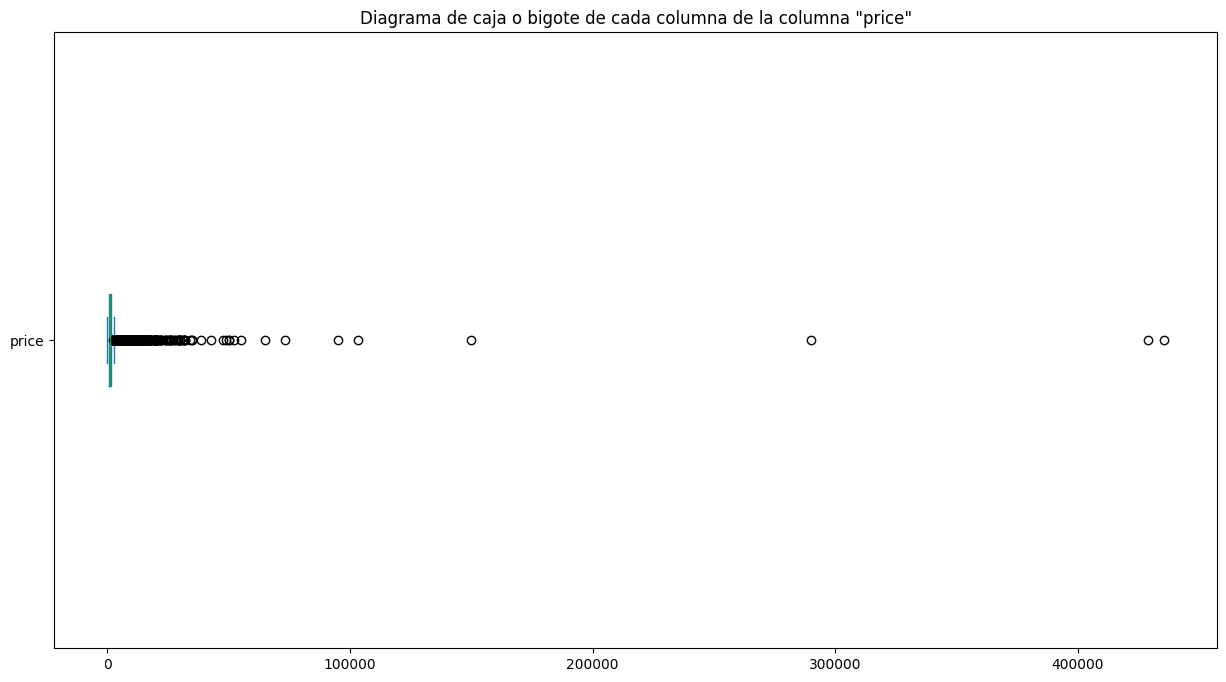

In [10]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['price'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de cada columna de la columna "price"')
plt.show()

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINACIÓN DE OUTLIERS EN DATAFRAME**

In [11]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Límite inferior permitido", Limite_Inferior)

Límite superior permitido host_response_rate                                150.989173
host_acceptance_rate                              157.815808
host_listings_count                               329.556645
host_total_listings_count                         614.887404
latitude                                           19.532892
longitude                                         -99.066742
accommodates                                       10.430103
bedrooms                                            5.373479
beds                                                7.217845
price                                           15782.311872
minimum_nights                                     81.830056
maximum_nights                                   1793.886762
availability_30                                    48.523868
availability_60                                    97.331591
availability_90                                   149.606839
availability_365                                  602.60927

In [12]:
data2=cuantitativas [(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,NaN,99.0,1.0,1.0,19.383820,NaN,2.0,1.0,1.0,3865.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.0,0.0
1,100.0,93.0,12.0,13.0,19.411620,-99.177940,NaN,5.0,1.0,999.0,...,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0
2,71.0,57.0,3.0,4.0,19.411520,-99.168570,4.0,2.0,2.0,2029.0,...,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0
3,100.0,100.0,3.0,4.0,19.356140,-99.163080,2.0,1.0,1.0,1140.0,...,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0
4,100.0,100.0,5.0,7.0,19.432110,-99.193270,2.0,1.0,1.0,3633.0,...,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,100.0,100.0,167.0,279.0,19.387329,-99.246731,4.0,2.0,2.0,488.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,37.0,14.0,23.0
26578,100.0,100.0,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,2800.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0
26579,100.0,100.0,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,2700.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0
26580,100.0,100.0,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,2600.0,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0


In [13]:
valores_nulos1= data2.isnull().sum()
valores_nulos1

host_response_rate                               990
host_acceptance_rate                            1105
host_listings_count                              304
host_total_listings_count                        380
latitude                                         357
longitude                                        712
accommodates                                     526
bedrooms                                         289
beds                                             372
price                                             94
minimum_nights                                   190
maximum_nights                                     1
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                                608
number_of_reviews_ltm                            432
number_of_reviews_l30d                        

In [14]:
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

valores_nulos = data_clean.isnull().sum().sum()
valores_nulos

np.int64(0)

**PROCEDIMIENTO "CUARTILES" PARA CALCULAR OUTLIERS**

In [15]:
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q1
iqr=percentile75-percentile25

Limite_Superior_iqr=percentile75 + 1.5*iqr
Limite_Inferior_iqr=percentile25 + 1.5*iqr

In [16]:
#Obtenemos datos limpios del Dataframe

df3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3_iqr

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2029.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN
26578,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN
26579,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN
26580,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN


In [17]:
valores_nulos=df3_iqr.isnull().sum()
valores_nulos

host_response_rate                               5377
host_acceptance_rate                            26582
host_listings_count                             24963
host_total_listings_count                       25060
latitude                                        25389
longitude                                       24313
accommodates                                    23096
bedrooms                                        24575
beds                                            23382
price                                           24418
minimum_nights                                  23676
maximum_nights                                  26581
availability_30                                 26582
availability_60                                 26582
availability_90                                 26582
availability_365                                26582
number_of_reviews                               24320
number_of_reviews_ltm                           23878
number_of_reviews_l30d      

In [18]:
valores_nulos=df3_iqr.isnull().sum().sum()
valores_nulos

np.int64(714824)

In [19]:
data_clean_iqr=data2.copy()
data_clean_iqr=data_clean.fillna(round(data2.mean(),1))
data_clean_iqr

valores_nulos=data_clean_iqr.isnull().sum().sum()
valores_nulos

np.int64(0)

In [20]:
#Union del dataframe cuantitativo con el cualitativo 

Datos_limpios = pd.concat([cualitativas, data_clean_iqr], axis=1)
Datos_limpios

,name,description,neighborhood_overview,host_name,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_identity_verified,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",Dici,"Mexico City, Mexico",a few days or more,f,Sin especificar,"['email', 'phone', 'work_email']",t,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.0,0.0
1,Condesa Haus,A new concept of hosting in mexico through a b...,Sin descripción,Fernando,"Mexico City, Mexico",within an hour,t,Condesa,"['email', 'phone', 'work_email']",t,...,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0
2,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Sin descripción,Nicholas,"Mexico City, Mexico",within an hour,t,Hipódromo,"['email', 'phone']",t,...,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0
3,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,"Mexico City, Mexico",within a few hours,t,Coyoacán,"['email', 'phone', 'work_email']",t,...,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0
4,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,"Mexico City, Mexico",within an hour,t,Polanco,"['email', 'phone']",t,...,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,"Welcome to Lomas de Bezares, a neighborhood kn...",HostPal,"Mexico City, Mexico",within an hour,t,Sin especificar,"['email', 'phone']",t,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,37.0,14.0,23.0
26578,Suite King | District Polanco,This spacious room features a plush king-size ...,Sin descripción,Luis Angel,"Mexico City, Mexico",within an hour,f,Polanco,"['email', 'phone']",t,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0
26579,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Sin descripción,Luis Angel,"Mexico City, Mexico",within an hour,f,Polanco,"['email', 'phone']",t,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0
26580,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Sin descripción,Luis Angel,"Mexico City, Mexico",within an hour,f,Polanco,"['email', 'phone']",t,...,4.80,4.80,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0


In [21]:
Datos_limpios.to_csv('Datos_Limpios_Mexico.csv')